<a href="https://colab.research.google.com/github/yoonhyun123/AI/blob/main/%EB%8B%B9%EB%87%A8_%EC%9D%B4%EB%B6%84%ED%98%95%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV 파일을 업로드하세요.


Saving Cleaned_Health_Data.csv to Cleaned_Health_Data (2).csv

데이터 첫 5행:
   Unnamed: 0  Diabetes  WaistCircumference         BMI  GenderCode  Elderly
0           0         1                90.0  336.734694           1        0
1           1         1                89.8  242.214533           1        0
2           2         1               115.0  136.105860           1        0
3           3         1               105.0  185.000000           1        0
4           4         1               103.0  170.000000           1        0

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38223 entries, 0 to 38222
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          38223 non-null  int64  
 1   Diabetes            38223 non-null  int64  
 2   WaistCircumference  38223 non-null  float64
 3   BMI                 38223 non-null  float64
 4   GenderCode          38223 non-null  int64  
 5   

                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                38223
Model:                          Logit   Df Residuals:                    38218
Method:                           MLE   Df Model:                            4
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                0.003359
Time:                        12:13:59   Log-Likelihood:                -20577.
converged:                       True   LL-Null:                       -20646.
Covariance Type:            nonrobust   LLR p-value:                 5.395e-29
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5938      0.219     -2.711      0.007      -1.023      -0.165
BMI                    0.0008      0.000      5.647      0.000       0.001       0.001
WaistCircumference  

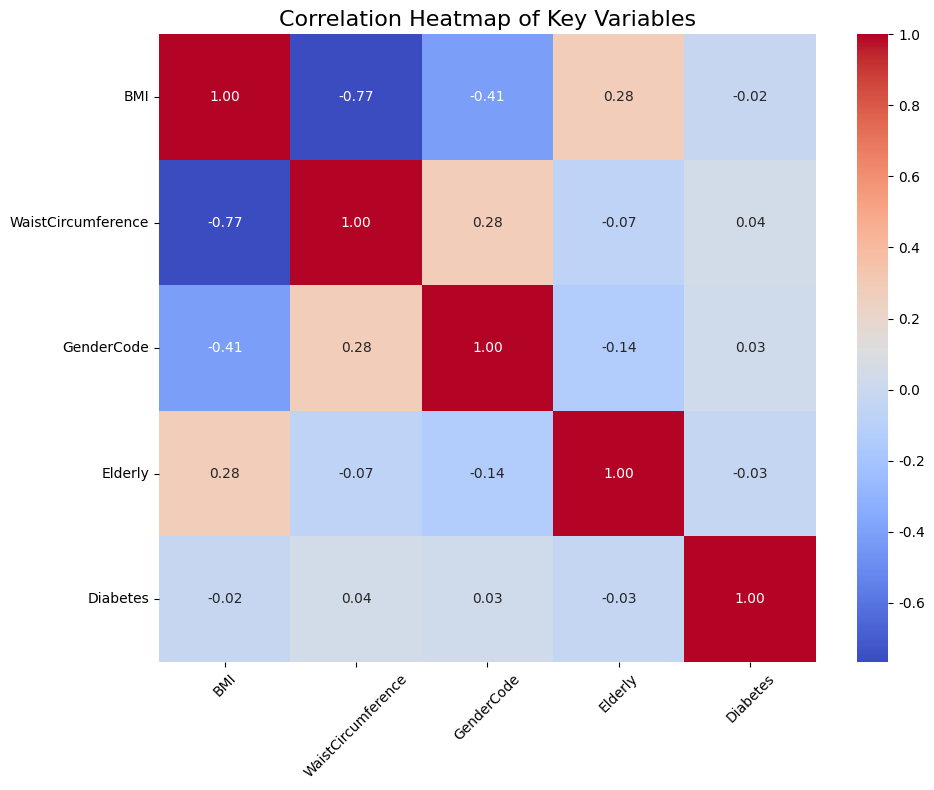

In [13]:
# 필요한 라이브러리 임포트
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# 1. CSV 파일 업로드
print("CSV 파일을 업로드하세요.")
uploaded = files.upload()

# 2. 업로드한 CSV 파일 로드
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name, encoding='cp949')  # 인코딩은 필요에 따라 변경 가능

# 3. 변수명을 영어로 변경
data.rename(columns={
    'BMI': 'BMI',
    '허리둘레': 'WaistCircumference',
    '성별코드': 'GenderCode',
    '노인여부': 'Elderly',
    '당뇨여부': 'Diabetes'
}, inplace=True)

# 4. 데이터 확인
print("\n데이터 첫 5행:")
print(data.head())
print("\n데이터 정보:")
print(data.info())

# 5. 독립변수와 종속변수 설정
# 'Diabetes'가 종속변수이고, 나머지가 독립변수
X = data[['BMI', 'WaistCircumference', 'GenderCode', 'Elderly']]  # 독립변수
y = data['Diabetes']  # 종속변수

# 6. 상수항 추가
X = sm.add_constant(X)

# 7. 이분형 로지스틱 회귀 모델 생성 및 적합
logit_model = sm.Logit(y, X)  # 로지스틱 회귀 모델 정의
result = logit_model.fit()  # 모델 학습

# 8. 결과 요약 출력
print("\n로지스틱 회귀 분석 결과 요약:")
print(result.summary())

# 9. 예측값 계산 및 데이터프레임에 추가
data['PredictedProbability'] = result.predict(X)
print("\n당뇨여부와 예측 확률:")
print(data[['Diabetes', 'PredictedProbability']].head())

# 10. 변수 간 상관 계수 히트맵 생성
correlation_data = data[['BMI', 'WaistCircumference', 'GenderCode', 'Elderly', 'Diabetes']]
correlation_matrix = correlation_data.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Key Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
